In [64]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback

from tensorflow.keras.utils import to_categorical #to trasform labels categorical
from tensorflow.keras.datasets import cifar10 #to load the dataset

import numpy as np
import matplotlib.pyplot as plt
from keras import backend as k


from google.colab import files

In [65]:

#just to set some standard plot format
import matplotlib as mpl
mpl.style.use('classic')

In [66]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train= (x_train.astype('float32'))/255.0
x_test = (x_test.astype('float32'))/255.0


In [68]:
nClasses = 10
y_train = tf.keras.utils.to_categorical(y_train, nClasses)
y_test = tf.keras.utils.to_categorical(y_test, nClasses)

In [69]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 10)


In [70]:
input_shape =(32,32,3)

In [71]:
def createModel():
    model=Sequential()
    model.add(Conv2D(32,(3,3),padding='same',activation='relu', input_shape=input_shape))
    model.add(Conv2D(32,(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses,activation='softmax'))

    return model


In [72]:
k.clear_session()
model=createModel()

In [73]:
AdamOpt=Adam(lr=0.001)
model.compile(optimizer=AdamOpt, loss='categorical_crossentropy',
              metrics=['accuracy'])

In [74]:
model.summary( )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

In [75]:
#CustomcCallBack class for logging
class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(epoch%5==0):
            print("just finished epoch",epoch)
            print("------------------------------------")
            print('Loss evaluated on the validation dataset =',
                  logs.get('val_loss'))
            print('Accuracy reached train is',
                  logs.get('accuracy'))
            print('Accuracy reached Val is',
                  logs.get('val_accuracy'))
            return

In [76]:
#training of the network
batch_size=256
epochs=100

CC= CustomCallback()
all_logs= model.fit(x_train, y_train,batch_size=batch_size, epochs=epochs,
                   verbose=0,
                   validation_data=(x_test,y_test),
                   callbacks=[CC]) 
                   


just finished epoch 0
------------------------------------
Loss evaluated on the validation dataset = 1.5859875679016113
Accuracy reached train is 0.24899999797344208
Accuracy reached Val is 0.4171999990940094
just finished epoch 5
------------------------------------
Loss evaluated on the validation dataset = 0.89666348695755
Accuracy reached train is 0.6244800090789795
Accuracy reached Val is 0.6812999844551086
just finished epoch 10
------------------------------------
Loss evaluated on the validation dataset = 0.8453896641731262
Accuracy reached train is 0.6944800019264221
Accuracy reached Val is 0.7075999975204468
just finished epoch 15
------------------------------------
Loss evaluated on the validation dataset = 0.70505690574646
Accuracy reached train is 0.7321000099182129
Accuracy reached Val is 0.7573000192642212
just finished epoch 20
------------------------------------
Loss evaluated on the validation dataset = 0.6238760948181152
Accuracy reached train is 0.756540000438690

In [77]:
def plot_all_logs(all_logs):
    # loss
    #for logs in all_logs:
    y_coords = all_logs.history['loss']
    x_coords = list(range(len(y_coords)))
    plt.plot(x_coords, y_coords)

    plt.grid()
    plt.show()

    # val_loss
    #for logs in all_logs:
    y_coords = all_logs.history['val_loss']
    x_coords = list(range(len(y_coords)))
    plt.plot(x_coords, y_coords)

    plt.grid()
    plt.show()

    # acc
    #for logs in all_logs:
    y_coords = all_logs.history['accuracy']
    x_coords = list(range(len(y_coords)))
    plt.plot(x_coords, y_coords)

    plt.grid()
    plt.show()

    # val_acc
    #for logs in all_logs:
    y_coords = all_logs.history['val_accuracy']
    x_coords = list(range(len(y_coords)))
    plt.plot(x_coords, y_coords)

    plt.grid()
    plt.show()

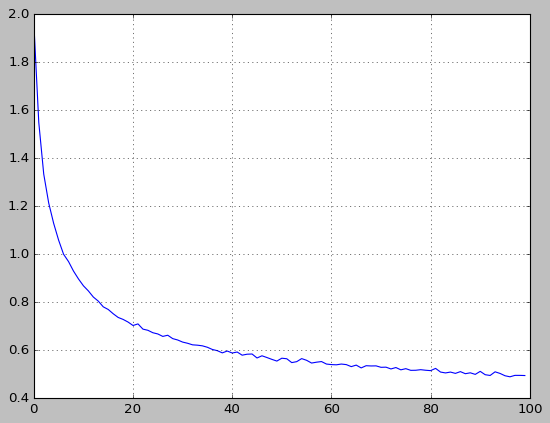

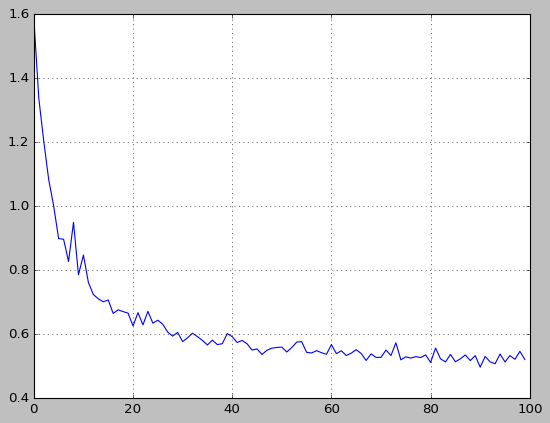

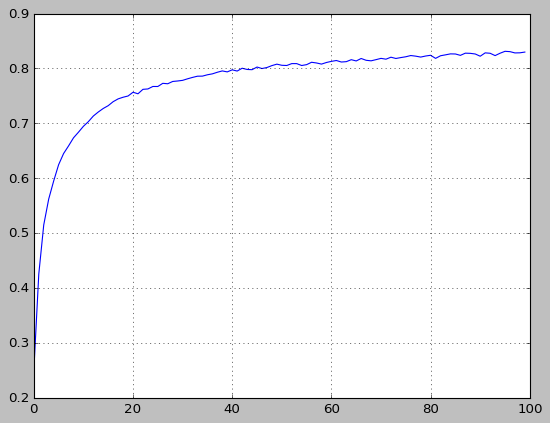

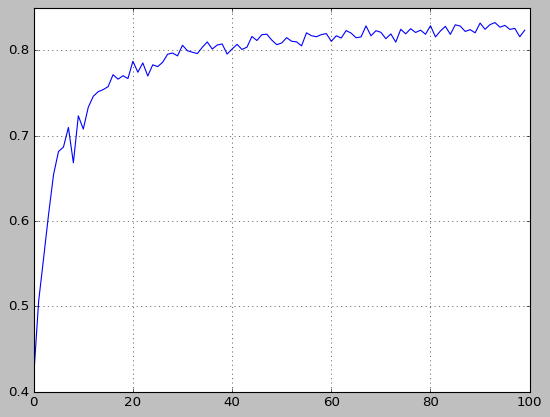

In [78]:
plot_all_logs(all_logs)